**Penerapan Logika Fuzzy Mamdani untuk Menentukan Kecepatan Robot**




In [ ]:
pip install -U scikit-fuzzy

1.3


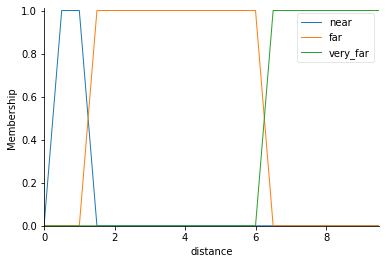

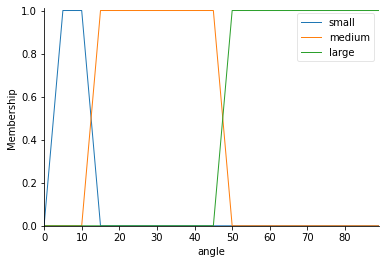

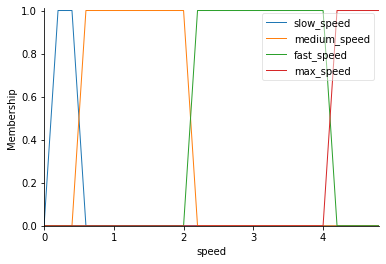

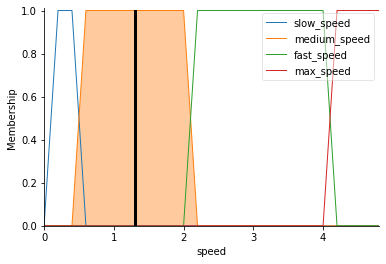

In [ ]:
# Maulana Bintang Irfansyah - TI 2H
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

from skfuzzy import control as ctrl

# Objek antecedent menyimpan variabel global
# untuk variabel input jarak dan sudut
distance_obj = ctrl.Antecedent(np.arange(0, 10, 0.5), 'distance')
angle_obj = ctrl.Antecedent(np.arange(0, 90, 1), 'angle')

# Meng-generate fungsi keanggotaan untuk 2 variabel
distance_obj['near'] = fuzz.trapmf(distance_obj.universe, [0, 0.5, 1, 1.5])
distance_obj['far'] = fuzz.trapmf(distance_obj.universe, [1, 1.5, 6, 6.5])
distance_obj['very_far'] = fuzz.trapmf(distance_obj.universe, [6, 6.5, 10, 10])

angle_obj['small'] = fuzz.trapmf(angle_obj.universe, [0, 5, 10, 15])
angle_obj['medium'] = fuzz.trapmf(angle_obj.universe, [10, 15, 45, 50])
angle_obj['large'] = fuzz.trapmf(angle_obj.universe, [45, 50, 90, 90])

distance_obj.view()
angle_obj.view()

# Objek consequent menyimpan variabel global
# untuk variabel output kecepatan
speed_obj = ctrl.Consequent(np.arange(0, 5, 0.2), 'speed', 'centroid')

# Meng-generate fungsi keanggotaan untuk 1 variabel
speed_obj['slow_speed'] = fuzz.trapmf(speed_obj.universe, [0, 0.2, 0.4, 0.6])
speed_obj['medium_speed'] = fuzz.trapmf(speed_obj.universe, [0.4, 0.6, 2, 2.2])
speed_obj['fast_speed'] = fuzz.trapmf(speed_obj.universe, [2, 2.2, 4, 4.2])
speed_obj['max_speed'] = fuzz.trapmf(speed_obj.universe, [4, 4.2, 5, 5])

speed_obj.view()

# Mendefinisikan 9 aturan pakar
rule_one = ctrl.Rule(distance_obj['near'] & angle_obj['small'],
                     (speed_obj['slow_speed']))
rule_two = ctrl.Rule(distance_obj['near'] & angle_obj['medium'],
                     (speed_obj['medium_speed']))
rule_three = ctrl.Rule(distance_obj['near'] & angle_obj['large'],
                       (speed_obj['medium_speed']))
rule_four = ctrl.Rule(distance_obj['far'] & angle_obj['small'],
                      (speed_obj['medium_speed']))
rule_five = ctrl.Rule(distance_obj['far'] & angle_obj['medium'],
                      (speed_obj['medium_speed']))
rule_six = ctrl.Rule(distance_obj['far'] & angle_obj['large'],
                     (speed_obj['max_speed']))
rule_seven = ctrl.Rule(distance_obj['very_far'] & angle_obj['small'],
                       (speed_obj['max_speed']))
rule_eight = ctrl.Rule(distance_obj['very_far'] & angle_obj['medium'],
                       (speed_obj['max_speed']))
rule_nine = ctrl.Rule(distance_obj['very_far'] & angle_obj['large'],
                      (speed_obj['max_speed']))

# deffuzifikasi 

obstacle_ctrl = ctrl.ControlSystem(
    [rule_one, rule_two, rule_three, rule_four, rule_five, rule_six, rule_seven, rule_eight, rule_nine])
obstacle_avoidance = ctrl.ControlSystemSimulation(obstacle_ctrl)
# Contoh ke-1
obstacle_avoidance.input['distance'] = 1
obstacle_avoidance.input['angle'] = 90

obstacle_avoidance.compute()

print(obstacle_avoidance.output['speed'])
speed_obj.view(sim=obstacle_avoidance)

4.409914529914531


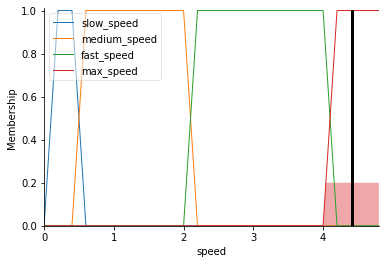

In [ ]:
# Contoh ke-2
obstacle_avoidance.input['distance'] = 7
obstacle_avoidance.input['angle'] = 1

obstacle_avoidance.compute()

print(obstacle_avoidance.output['speed'])
speed_obj.view(sim=obstacle_avoidance)